# Baseline corrections

In [1]:
from spectrochempy.api import *

SpectroChemPy's API - v.0.1a4.dev, Copyright 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)


In [2]:
source = NDDataset.read_omnic(os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset: [[   2.057,    2.061, ...,    2.013,    2.012],
            [   2.033,    2.037, ...,    1.913,    1.911],
            ..., 
            [   1.794,    1.791, ...,    1.198,    1.198],
            [   1.816,    1.815, ...,    1.240,    1.238]] a.u.

<IPython.core.display.Javascript object>


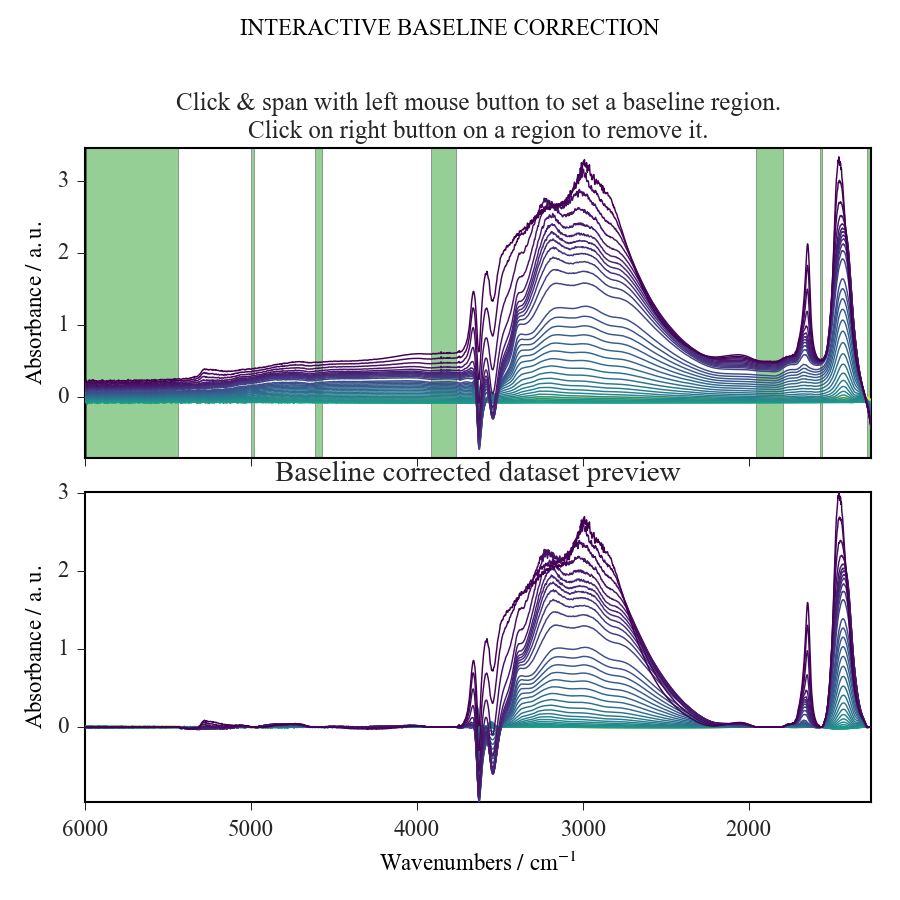

In [3]:
s = source[:, 1260.0:5999.0]  
s = s - s[-1]

# Important note that we use floating point number
# integer would mean points, not wavenumbers!
    
basc = BaselineCorrection(s)

ranges=[[1261.86, 1285.89],
        [1556.30, 1568.26],
        [1795.00, 1956.75], 
        [3766.03, 3915.81],  
        [4574.26, 4616.04], 
        [4980.10, 4998.01],
        [5437.52, 5994.70]]  # predifined ranges

_ = basc.run(*ranges, method='multivariate',
                  interpolation='pchip',
                  npc=5,
                  figsize=(6,6),
                  zoompreview=4)

The regions used to set the baseline are accessible using the `ranges` attibute:

In [4]:
ranges = basc.ranges
print(ranges)

[[5996.6629999999996, 5998.5910000000003], [1260.2729999999999, 1262.202], [1261.86, 1285.89], [1556.3, 1568.26], [1795.0, 1956.75], [3766.03, 3915.81], [4574.26, 4616.04], [4980.1, 4998.01], [5437.52, 5994.7]]


<IPython.core.display.Javascript object>


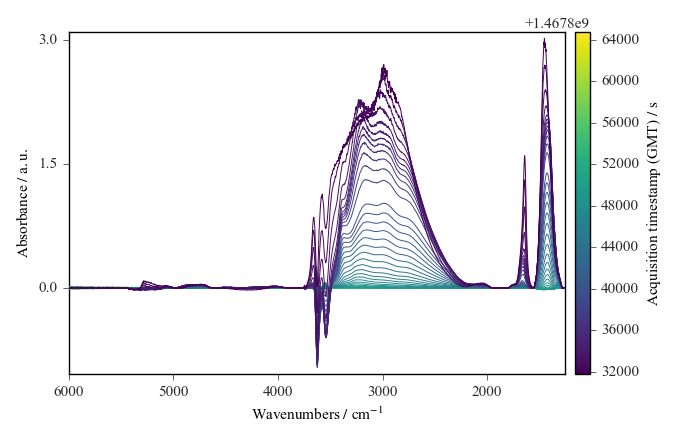

In [5]:
basc.corrected.plot_stack()